In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<Figure size 432x288 with 0 Axes>

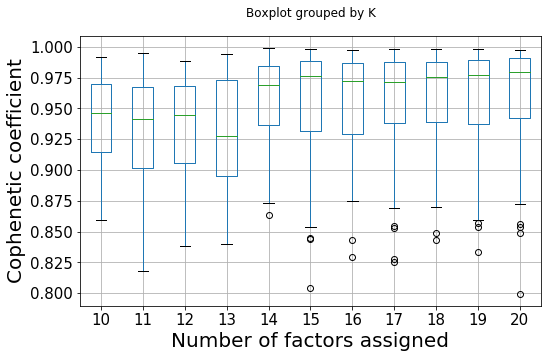

In [3]:

fn = 'output/choose_para.txt'
result = pd.read_csv(fn, sep='\t')
result['nfactor'] = [round(x) for x in result['nfactor']]


## 2.0 Examine the cophenetic coefficient for different K values

plt.figure()
result.boxplot(by = 'K', column = 'coph', figsize=(8,5), fontsize = 15)
plt.xlabel("Number of factors assigned", size = 20)
plt.ylabel('Cophenetic coefficient', size = 20)
plt.title('')
plt.show()
plt.close()

output/sn_spMF_K17_a1100_l190/sn_spMF_FactorMatrix_K17_a1100_l190_Run7.txt


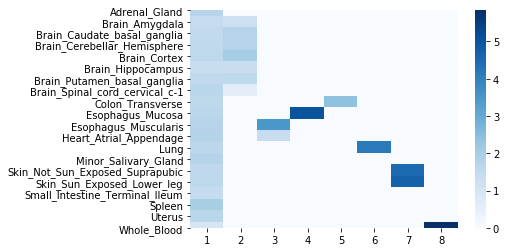

,K,alpha1,lambda1,coph,correlation,nfactor,optimal_run,optimal_obj
429,17,100,90,0.954542,2.922810,7,7,56978.839243
434,18,50,100,0.955777,3.404028,9,5,47548.516782
428,18,100,40,0.954444,3.425596,10,21,44432.432271
413,14,60,80,0.951155,3.427712,10,9,47042.518178
485,15,50,90,0.961932,3.454837,10,27,45931.356814
...,...,...,...,...,...,...,...,...
899,19,10,70,0.992177,4.711010,19,19,19064.733788
921,20,10,80,0.994063,4.751342,19,23,20046.021016
958,20,10,50,0.995783,4.752620,20,9,15055.739449
964,20,10,70,0.995977,4.764555,19,19,18683.558599


In [6]:

## 2.1. Filter out implementations with low cophenetic coefficient
##      tried 0.9, 0.85 - result in very similar optimal solution
res = res[res['coph'] >= 0.95]


## 2.2. Choose the implementation with the most independent factors
res = res.sort_values('correlation')
i = 0
K = str(int(res.iloc[i]['K']))
a1 = str(int(res.iloc[i]['alpha1']))
l1 = str(int(res.iloc[i]['lambda1']))
run_idx = str(int(res.iloc[i]['optimal_run']))


## Visualize the learned factor matrix
factor = 'K%s_a1%s_l1%s' % (K, a1, l1)
ffn = 'output/sn_spMF_%s/sn_spMF_FactorMatrix_%s_Run%s.txt' % (factor, factor, run_idx)
print(ffn)
fM = pd.read_csv(ffn, sep='\t')


sns.heatmap(fM, cmap = 'Blues')
plt.show()
plt.close()

res